In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_xgboost_exact = pd.read_pickle('../results/xgboost_exact.pkl')
df_xgboost_fast_hist = pd.read_pickle('../results/xgboost_fast_hist.pkl')
df_xgboost = pd.concat((df_xgboost_exact, df_xgboost_fast_hist))
df_lightgbm = pd.read_pickle('../results/lightgbm.pkl')

This is a trick to make easy plot. See with Joris how to manage that.

In [3]:
df_xgboost.loc[df_xgboost['tree_method'] == 'exact', 'tree_method'] = 'xgboost-exact'
df_xgboost.loc[df_xgboost['tree_method'] == 'hist', 'tree_method'] = 'xgboost-fast-hist'
df_lightgbm.loc[df_lightgbm['boosting'] == 'gbdt', 'boosting'] = 'lightgbm'

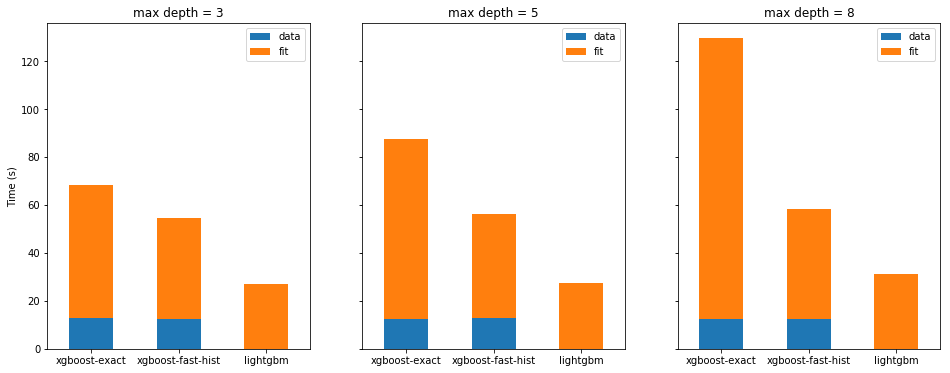

In [4]:
f, axs = plt.subplots(1, 3, sharey=True, figsize=(16, 6))

df_xgboost_group = df_xgboost.set_index('tree_method').groupby(['max_depth'])
df_lightgbm_group = df_lightgbm.set_index('boosting').groupby(['max_depth'])
for ax, (i, group_xgboost), (j, group_lightgbm) in zip(axs, df_xgboost_group, df_lightgbm_group):
    timing_xgboost = group_xgboost[['time_data', 'time_fit']].astype(int) / 1e9
    timing_xgboost.columns = ['data', 'fit']
    timing_lightgbm = group_lightgbm[['time_data', 'time_fit']].astype(int) / 1e9
    timing_lightgbm.columns = ['data', 'fit']
    timing = pd.concat((timing_xgboost, timing_lightgbm))
    timing.plot.bar(stacked=True, ax=ax, rot=0)
    ax.set_title('max depth = {}'.format(i))
    ax.set_ylabel('Time (s)')
    ax.set_xlabel('')